In [4]:
import random
#from faker import Faker
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [5]:
# Ruta relativa
ruta_csv_users = "../data/processed/users_processed.csv"

In [6]:
# Leemos el DataFrame
df = pd.read_csv(ruta_csv_users)
df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad,mes_registro,franja_edad,valor_franja_edad,tiene_hijos,cp_encoded,zona
0,2023-04-24,655346,0,28023,5,69,4,65+,3,1,22,2
1,2023-06-02,279526,1,28037,2,89,6,65+,3,1,36,2
2,2023-03-20,797457,1,28035,2,77,3,65+,3,1,34,0
3,2023-02-03,803906,1,28026,2,87,2,65+,3,1,25,1
4,2023-01-25,314182,1,28024,0,62,1,45-64,2,0,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21,3,17-24,0,1,59,2
496,2023-02-26,802317,0,28054,1,93,2,65+,3,1,53,1
497,2023-02-02,549513,0,28053,2,99,2,65+,3,1,52,0
498,2023-02-04,292753,0,28026,4,81,2,65+,3,1,25,1


In [7]:
df.dtypes

fecha_registro       object
user_id               int64
sexo                  int64
cp                    int64
n_hijos_menores       int64
edad                  int64
mes_registro          int64
franja_edad          object
valor_franja_edad     int64
tiene_hijos           int64
cp_encoded            int64
zona                  int64
dtype: object

In [8]:
# Ruta relativa
ruta_csv_quiz = "../data/quiz/answers.csv"

In [9]:
dfq = pd.read_csv(ruta_csv_quiz)
dfq

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total
0,655346,0,0,1,1,1,0,0,1,0,1,5
1,279526,1,1,0,1,0,1,1,1,0,1,7
2,797457,0,0,1,0,1,1,1,1,1,0,6
3,803906,0,1,1,1,1,1,1,0,1,1,8
4,314182,0,1,0,1,1,0,1,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,204336,0,0,1,1,1,0,0,0,1,0,4
496,802317,0,1,1,0,0,1,0,1,0,1,5
497,549513,1,0,0,1,0,1,1,0,0,0,4
498,292753,0,1,1,0,1,1,0,0,1,1,6


In [10]:
# Create a new column 'new_column' based on the 'total' column
dfq['target'] = dfq['total'].apply(lambda x: 1 if x >= 7 else 0)

dfq

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,target
0,655346,0,0,1,1,1,0,0,1,0,1,5,0
1,279526,1,1,0,1,0,1,1,1,0,1,7,1
2,797457,0,0,1,0,1,1,1,1,1,0,6,0
3,803906,0,1,1,1,1,1,1,0,1,1,8,1
4,314182,0,1,0,1,1,0,1,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,204336,0,0,1,1,1,0,0,0,1,0,4,0
496,802317,0,1,1,0,0,1,0,1,0,1,5,0
497,549513,1,0,0,1,0,1,1,0,0,0,4,0
498,292753,0,1,1,0,1,1,0,0,1,1,6,0


In [11]:
dfq['target'].value_counts()

0    424
1     76
Name: target, dtype: int64

In [12]:
df2 = df[['user_id', 'sexo', 'valor_franja_edad', 'tiene_hijos', 'zona']]
df2

,user_id,sexo,valor_franja_edad,tiene_hijos,zona
0,655346,0,3,1,2
1,279526,1,3,1,2
2,797457,1,3,1,0
3,803906,1,3,1,1
4,314182,1,2,0,1
...,...,...,...,...,...
495,204336,1,0,1,2
496,802317,0,3,1,1
497,549513,0,3,1,0
498,292753,0,3,1,1


In [13]:
df_merged = pd.merge(df2, dfq[['user_id', 'target']], on='user_id', how='left')

df_merged

,user_id,sexo,valor_franja_edad,tiene_hijos,zona,target
0,655346,0,3,1,2,0
1,279526,1,3,1,2,1
2,797457,1,3,1,0,0
3,803906,1,3,1,1,1
4,314182,1,2,0,1,0
...,...,...,...,...,...,...
495,204336,1,0,1,2,0
496,802317,0,3,1,1,0
497,549513,0,3,1,0,0
498,292753,0,3,1,1,0


In [14]:
df_merged['target'].value_counts()

0    424
1     76
Name: target, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
# Create 'mldf' by dropping the 'user_id' column from 'df_merged'
mldf = df_merged.drop('user_id', axis=1)

# Separate features and target variable in 'mldf'
X_mldf = mldf.drop('target', axis=1)
y_mldf = mldf['target']

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to balance the target column in 'mldf'
X_resampled, y_resampled = smote.fit_resample(X_mldf, y_mldf)

# Create a new DataFrame 'data' with the balanced data
data = pd.DataFrame(X_resampled, columns=X_mldf.columns)
data['target'] = y_resampled

# Check the balance of the 'target' column in the balanced DataFrame 'data'
target_counts_balanced = data['target'].value_counts()

print(target_counts_balanced)

0    424
1    424
Name: target, dtype: int64


In [17]:
X = data.drop('target', axis=1)
y = data['target']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(678, 4)
(170, 4)
(678,)
(170,)


In [21]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        84
           1       0.58      0.58      0.58        86

    accuracy                           0.58       170
   macro avg       0.58      0.58      0.58       170
weighted avg       0.58      0.58      0.58       170

Confusion Matrix:
[[48 36]
 [36 50]]


In [32]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', LogisticRegression())  # Best model: LogisticRegression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        84
           1       0.56      0.62      0.59        86

    accuracy                           0.56       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.56      0.56      0.56       170

Confusion Matrix:
[[43 41]
 [33 53]]


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Create and fit the Decision Tree model with max_depth=3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5470588235294118
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49        84
           1       0.54      0.65      0.59        86

    accuracy                           0.55       170
   macro avg       0.55      0.55      0.54       170
weighted avg       0.55      0.55      0.54       170

Confusion Matrix:
[[37 47]
 [30 56]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Create and fit the Random Forest model
model = RandomForestClassifier(n_estimators=250, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5705882352941176
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53        84
           1       0.57      0.65      0.61        86

    accuracy                           0.57       170
   macro avg       0.57      0.57      0.57       170
weighted avg       0.57      0.57      0.57       170

Confusion Matrix:
[[41 43]
 [30 56]]


In [28]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', RandomForestClassifier())  # Best model: randforest
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5764705882352941


In [29]:
# Create and fit the Decision Tree model with max_depth=3
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5647058823529412
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        84
           1       0.56      0.62      0.59        86

    accuracy                           0.56       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.56      0.56      0.56       170

Confusion Matrix:
[[43 41]
 [33 53]]


In [30]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', RandomForestClassifier(n_estimators=250, max_depth=3, random_state=42))  # Best model: randforest
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5705882352941176
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        84
           1       0.56      0.62      0.59        86

    accuracy                           0.56       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.56      0.56      0.56       170

Confusion Matrix:
[[43 41]
 [33 53]]


In [31]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', RandomForestClassifier(n_estimators=250, max_depth=4, random_state=42))  # Best model: randforest
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5647058823529412
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        84
           1       0.56      0.62      0.59        86

    accuracy                           0.56       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.56      0.56      0.56       170

Confusion Matrix:
[[43 41]
 [33 53]]


In [ ]:
#the following is the model we will use in streamlit

In [33]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', LogisticRegression())  # Best model: LogisticRegression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        84
           1       0.56      0.62      0.59        86

    accuracy                           0.56       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.56      0.56      0.56       170

Confusion Matrix:
[[43 41]
 [33 53]]


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

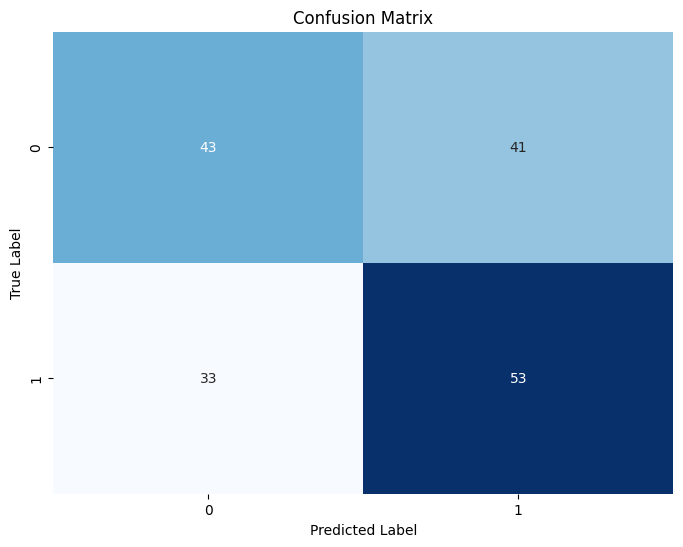

In [41]:
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import pickle

In [38]:
# Save the trained model
ruta_mod = "../models/trained_model.pkl"
with open(ruta_mod, 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
#the following is the streamlit script, not python.  you can put this in your streamlit code and erase it from here later if you wish.

In [ ]:
# the following uses a selectbox option to input values for the model prediction in streamlit, instead of using the sliders f